#ข้อ 1
##  ให้รวมข้อมูลจาก training กับ test เข้าด้วยกัน โดยรวม X_train กับ X_test เป็น X และรวม y_train กับ y_test เป็น y แล้วแสดงค่าของคลาสที่มีทั่งหมดใน y โดยค่าที่ควรจะได้คือ 1, 2, 3, 4, 5, 6 
## ความหมายของ labels เหล่านี้คือ :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
X_train = pd.read_csv('/content/data_train.txt', sep='\s+',header=None)
X_test = pd.read_csv('/content/data_test.txt', sep='\s+',header=None)
y_train = pd.read_csv('/content/data_train_labels.txt', sep='\s+',header=None)
y_test = pd.read_csv('/content/data_test_labels.txt', sep='\s+',header=None)

In [23]:
print("X_train shape is ",X_train.shape)
print("X_test shape is ",X_test.shape)
print("y_train shape is ",y_train.shape)
print("y_test shape is ",y_test.shape)

X_train shape is  (7352, 561)
X_test shape is  (2947, 561)
y_train shape is  (7352, 1)
y_test shape is  (2947, 1)


In [24]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [25]:
classes = np.sort(y[0].unique())
n_classes = len(classes)

In [26]:
print("labels is ",classes,"\nThe number of classes is",n_classes )

labels is  [1 2 3 4 5 6] 
The number of classes is 6


#ข้อ 2
##  ให้ปรับ Scale ของข้อมูลใน X ด้วย StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X)
X_scale = pd.DataFrame(scaler.transform(X))

In [58]:
X_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.210534,-0.068703,-0.452195,-0.883335,-0.945431,-0.744387,-0.874687,-0.944877,-0.773250,-0.868773,...,-0.819093,-0.000264,-0.299902,-0.357898,0.062039,-0.782988,-0.019034,-0.674432,0.382008,-0.016151
1,0.060208,0.035902,-0.275222,-0.890098,-0.929817,-0.860322,-0.883627,-0.927796,-0.858859,-0.884263,...,0.127803,-0.925905,-0.789555,0.135993,-0.022538,-1.217721,1.470315,-0.681360,0.383148,-0.000121
2,0.078460,-0.046427,-0.085548,-0.883565,-0.913598,-0.906457,-0.878093,-0.904569,-0.908437,-0.876139,...,1.172610,-0.287824,-0.461181,-0.375145,0.391762,0.134732,1.686961,-0.689471,0.384289,0.019214
3,0.071375,-0.227794,-0.270741,-0.885188,-0.946015,-0.935521,-0.879495,-0.943980,-0.938095,-0.876139,...,1.132149,0.566244,0.436736,-0.132194,-0.034739,1.010013,-0.982261,-0.688915,0.388536,0.024624
4,0.033738,0.031617,-0.121380,-0.889855,-0.940846,-0.935041,-0.882451,-0.937622,-0.940948,-0.883152,...,-0.158720,-0.165153,-0.263958,0.343504,0.268015,1.096950,-1.251689,-0.687381,0.399066,0.038649


#ข้อ 3
## ให้ใช้อัลกอริทึม PCA ในการลดขนาดของ dimensions โดยให้เหลือจํานวน components เท่าที่จําเป็น เพื่อให้ได้ค่า variance ที่จําเป็นในการอธิบายข้อมูลที่ปรับ scale แล้วอย่างน้อย 90% 
## ด้วยการใช้พารามิเตอร์ n_componentsและให้ใส่ค่า random_state = 17
## ดูวิธีการใส่ค่าของ n_compnents ได้จาก
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

In [30]:
from sklearn.decomposition import PCA

### Note!
https://vitalflux.com/pca-explained-variance-concept-python-example/

In [31]:
# กำหนด n_component=66 random_state=17
pca = PCA(n_components=66 ,random_state=17)
pca.fit(X_scale)
Xscale_pca = pca.fit_transform(X_scale)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

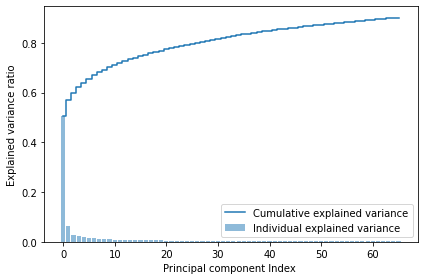

In [32]:
# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component Index ')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#ข้อ 4
##  ให้พิมพ์ค่าจํานวน components ที่ต้องใช้เพื่อให้ได้ค่า variance ที่สามารถอธิบายข้อมูลที่ปรับ scale แล้ว
## ได้ 90% (Hint ดูได้จากจํานวน column ที่เหลือของ X หลังจากทํา PCA แล้ว)

In [33]:
#หาจำนวน components  ที่มีความเเปรวนที่ทำให้ อธิบายข้อมูลได้อย่างน้อย 90%
index_components_90 = np.array(np.where(cum_sum_eigenvalues >= 0.9))
print('จำนวน components อย่างน้อยที่อธิบายข้อมูลได้อย่างน้อย 90% คือ {}'.format(index_components_90[0][0]+1))

จำนวน components อย่างน้อยที่อธิบายข้อมูลได้อย่างน้อย 90% คือ 66


#ข้อ 5
##  ให้แสดง % ของค่า variance ที่ first principal component สามารถอธิบายได้
## (Hint: ตัวแปร explained_variance_ratio_ของ pcaโดยเอาข้อมูลช่องแรก หรือช่องที่่ 0)

In [34]:
print('% ของคา่ variance ที่ first principal component สามารถอธิบายได้ คือ {:.2%}'.format(exp_var_pca[0]))

% ของคา่ variance ที่ first principal component สามารถอธิบายได้ คือ 50.74%


#ข้อ 6
##  Visualize ข้อมูลที่ถูก transform ใหม่ด้วยสอง components แรก ด้วยคําสั่ง

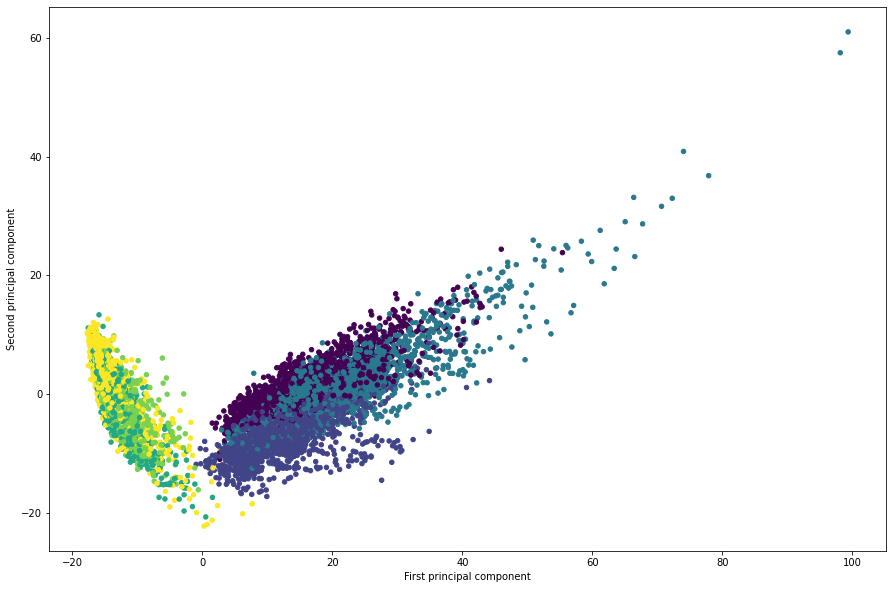

In [35]:
plt.figure(figsize=(15, 10))
plt.scatter(Xscale_pca[:,0], Xscale_pca[:,1] , c=y, s=20, cmap='viridis');
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

#ข้อ 7
##  ใช้ Kmeans ในการทํา clustering โดยใช้ข้อมูลที่ลดขนาด dimensions ด้วย PCA แล้ว (ในที่นี้เราพอรู้
## จากข้อมูลบ้างแล้วว่าจํานวนกิจกรรมที่มีจริงคือ 6 ตามจํานวน class labels ในชุดข้อมูล จึงควรแบ่งด้วย 
## n_clusters = 6แต่ในความเป็นจริงการเรียนรู้แบบไม่มีผู้สอน เราจะไม่รู้จํานวน clusters ล่วงหน้า)
## กําหนดให้ใช้พารามิเตอร์ของ Kmeans ดังนี้
## n_clusters = n_classes (number of unique labels of the target class)
## n_init = 100
## random_state = 17

In [36]:
 from sklearn.cluster import KMeans

In [37]:
kmeans = KMeans(n_clusters=n_classes,n_init = 100 , random_state=17)
kmeans.fit(Xscale_pca)
cluster_labels = pd.DataFrame(kmeans.labels_,index=y.index)

In [38]:
cluster_labels

,0
0,5
1,5
2,5
3,5
4,5
...,...
2942,2
2943,2
2944,2
2945,2


#ข้อ 8
##  Visualize ข้อมูลสอง components แรก แสดงสีของข้อมูลตามคลัสเตอร์ที่ถูกแบ่ง คลัสเตอร์ละหนึ่งสี
## หมายเหตุข้อมูลที่ผ่าน PCA แล้วอยู่ในตัวแปร X_PCA

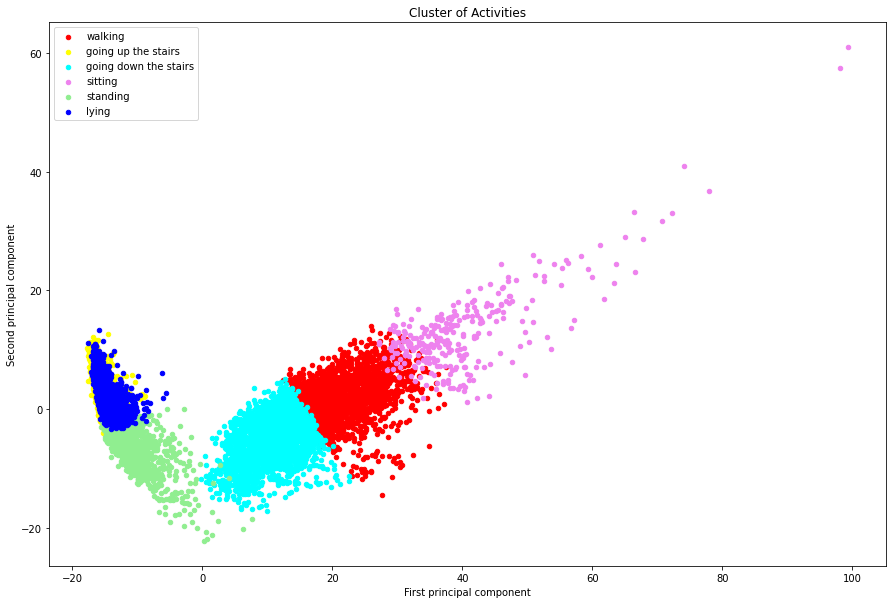

In [39]:
plt.figure(figsize=(15, 10))
plt.scatter(Xscale_pca[cluster_labels[0] ==0,0],Xscale_pca[cluster_labels[0] ==0,1] , c='red', s=20,label = 'walking')
plt.scatter(Xscale_pca[cluster_labels[0] ==1,0],Xscale_pca[cluster_labels[0] ==1,1] , c='yellow', s=20,label = 'going up the stairs')
plt.scatter(Xscale_pca[cluster_labels[0] ==2,0],Xscale_pca[cluster_labels[0] ==2,1] , c='aqua', s=20,label = 'going down the stairs')
plt.scatter(Xscale_pca[cluster_labels[0] ==3,0],Xscale_pca[cluster_labels[0] ==3,1] , c='violet', s=20,label = 'sitting')
plt.scatter(Xscale_pca[cluster_labels[0] ==4,0],Xscale_pca[cluster_labels[0] ==4,1] , c='lightgreen', s=20,label = 'standing')
plt.scatter(Xscale_pca[cluster_labels[0] ==5,0],Xscale_pca[cluster_labels[0] ==5,1] , c='blue', s=20,label = 'lying')
plt.title('Cluster of Activities')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

In [40]:
#เปรียบเทียบผลลัพธ์
tab = pd.crosstab(y[0],cluster_labels[0],margins=True)
tab.index = ['walking','going up the stairs','going sown the stairs','sitting','standing','lying','all']
tab.columns =['cluster'+str(i+1) for i in range(6)]+['all']

In [42]:
# ซึ่งจะได้ตารางที่มีคอลัมน์เป็นคลัสเตอร์ส่วนแถวเป็น activityจริง ตัวอย่างของข้อมูลในตารางแสดงดังภาพ
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,740,0,904,78,0,0,1722
going up the stairs,296,0,1241,5,2,0,1544
going sown the stairs,890,0,320,196,0,0,1406
sitting,0,92,1,0,450,1234,1777
standing,0,0,0,0,562,1344,1906
lying,0,1557,5,0,329,53,1944
all,1926,1649,2471,279,1343,2631,10299


จะเห็นได้ว่าในแต่ละ activity class ข้อมูลจะถูกระจายอยู่ในหลาย clusters ลองหาค่า % สูงสุดของข้อมูล
สําหรับแต่ละ activity class ที่ถูกจัดให้อยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่ง เพื่อดูนํ้าหนักการกระจายตัวของคลาส
ไปตาม cluster

ตัวอย่างเช่น ถ้าคลาส "going down the stairs" ซึ่งมีข้อมูลทั้งหมด 1406 ตัว จะกระจายอยู่ในแต่ละคลัสเตอร์
เท่าใด สมมติว่าอยู่ใน
• cluster 1 จํานวน 900
• cluster 3 จํานวน 500
• cluster 6 จํานวน 6
ดังนั้น % ของข้อมูลสูงสุดที่ถูกจัดให้อยู่ในคลัสเตอร์ใดคลัสเตอร์หนึ่งคือ 900/1406 = 0.64
รันโค้ดด้านล่างนี้เพื่อดูว่าในแต่ละกิจกรรมมีข้อมูลกระจายอยู่เป็นสัดส่วนอย่างไร สังเกตผล

In [43]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values/tab.iloc[:-1,-1].values,index = tab.index[:-1])

walking                  0.524971
going up the stairs      0.803756
going sown the stairs    0.633001
sitting                  0.694429
standing                 0.705142
lying                    0.800926
dtype: float64

#ข้อ 9
## จากผลที่ได้ แสดงว่า Kmeans ไม่ได้แยก activities เป็น 6 กลุ่มได้ดีนัก ให้ลองใช้ elbow method 
## ในการหาจํานวนคลัสเตอร์ที่เหมาะสม แสดงกราฟของ elbow method

In [44]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Xscale_pca)
    distortions.append(kmeanModel.inertia_)

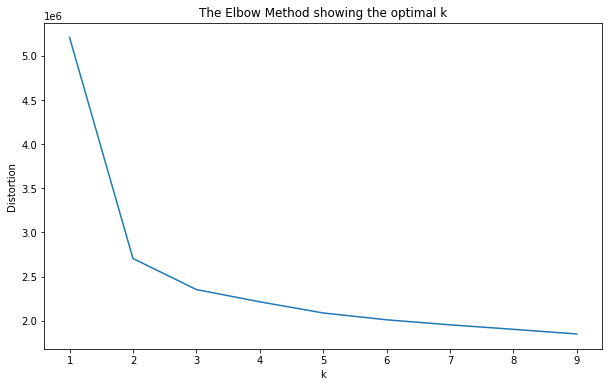

In [47]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### > จาก elbow curve พบว่า cluster ที่เหมาะสมคือ 2 กลุ่ม

### Note!
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://medium.com/espressofx-notebook/%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%AB%E0%B8%B2%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99-k-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%AA%E0%B8%B8%E0%B8%94%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2%E0%B8%A7%E0%B8%B4%E0%B8%98%E0%B8%B5-elbow-method-79b9a75f934

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

#ข้อ 10
## ทําข้อย่อยต่อไปนี้

##10.1
## รัน Kmeans ใหม่ด้วยจํานวนคลัสเตอร์ที่ได้จาก Elbow method โดยใช้พารามิเตอร์ชุดเดิม แต่
## เปลี่ยนแค่ค่า n_clusters เป็นจํานวนคลัสเตอร์ที่ได้จากข้อ9

In [48]:
kmeans_opt = KMeans(n_clusters=2,n_init = 100 , random_state=17)
kmeans_opt.fit(Xscale_pca)
cluster_labels_opt = pd.DataFrame(kmeans_opt.labels_,index=y.index)
centers = kmeans_opt.cluster_centers_

##10.2
## Plot กราฟการกระจายตัวของข้อมูลที่ได้ พร้อม cluster center

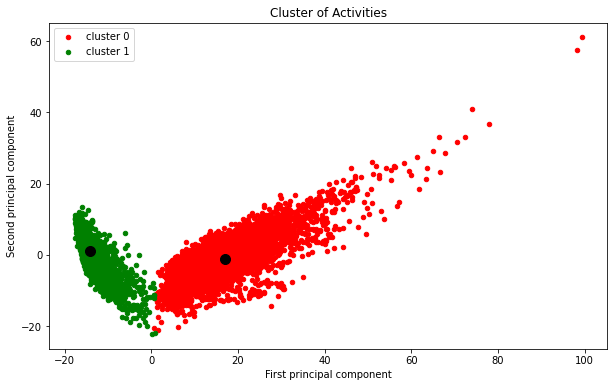

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(Xscale_pca[cluster_labels_opt[0] ==0,0],Xscale_pca[cluster_labels_opt[0] ==0,1] , c='red', s=20,label = 'cluster 0')
plt.scatter(Xscale_pca[cluster_labels_opt[0] ==1,0],Xscale_pca[cluster_labels_opt[0] ==1,1] , c='green', s=20,label = 'cluster 1')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1)
plt.title('Cluster of Activities')
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

##10.3
## ให้สรุปลักษณะเด่นของคลัสเตอร์ที่ได้ โดยเขียนเป็น Text (จํานวนคลัสเตอร์ที่ได้ วิเคราะห์และอธิบายลักษณะเด่นของแต่ละคลัสเตอร์)

In [50]:
tab1 = pd.crosstab(y[0],cluster_labels_opt[0],margins=True)
tab1.index = ['walking','going up the stairs','going sown the stairs','sitting','standing','lying','all']
tab1.columns =['cluster'+str(i) for i in range(2)]+['all']

In [51]:
tab1

,cluster0,cluster1,all
walking,1722,0,1722
going up the stairs,1536,8,1544
going sown the stairs,1406,0,1406
sitting,3,1774,1777
standing,0,1906,1906
lying,12,1932,1944
all,4679,5620,10299


## จาก scatter plot ข้อ 10.2 จะพบว่าลักษณะ
- cluster0 จะมีลักษณะที่มีค่า PC1 สูง(มีค่าเป็นบวก) ส่วน ค่า PC1 ของ cluster1 (มีค่าเป็นลบ)
(ซึ่งอาจหมายความว่าค่าวัดที่ได้จากเครื่องทั้ง 2 ของ cluster 0 มากกว่า cluster 1) 
- cluster0 เมื่อค่า PC1 สูงขึ้น ค่า PC2 จะเพิ่ม
- cluster1 เมื่อค่า PC1 สูงขึ้น ค่า PC2 ลดลง

## จากตารางข้อ 10.3: ตาราง tab1
เราสามารถจัดกลุ่มของทั้งสองใหม่ได้ดังนี้
- cluster0 = (walking,going up the stairs,going down the stairs) -> Movement group
- cluster1 = (sitting,standing,lying) -> Non-Movement group